In [30]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [12]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(June_temp)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [13]:
#  3. Convert the June temperatures to a list.
June_list = list(June_temp)
print(June_list)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [20]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(June_list, columns = ['date','temperature'])
June_df.set_index(June_df['date'], inplace=True)
print(June_df.to_string(index=False))

       date  temperature
 2010-06-01         78.0
 2010-06-02         76.0
 2010-06-03         78.0
 2010-06-04         76.0
 2010-06-05         77.0
 2010-06-06         78.0
 2010-06-07         77.0
 2010-06-08         78.0
 2010-06-09         78.0
 2010-06-10         79.0
 2010-06-11         78.0
 2010-06-12         78.0
 2010-06-13         78.0
 2010-06-14         77.0
 2010-06-15         78.0
 2010-06-16         78.0
 2010-06-17         77.0
 2010-06-18         77.0
 2010-06-19         82.0
 2010-06-20         78.0
 2010-06-21         78.0
 2010-06-22         78.0
 2010-06-23         78.0
 2010-06-24         78.0
 2010-06-25         77.0
 2010-06-26         76.0
 2010-06-27         78.0
 2010-06-28         78.0
 2010-06-29         78.0
 2010-06-30         78.0
 2011-06-01         77.0
 2011-06-02         78.0
 2011-06-03         73.0
 2011-06-04         70.0
 2011-06-05         76.0
 2011-06-06         77.0
 2011-06-07         77.0
 2011-06-08         77.0
 2011-06-09         77.0


In [21]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


       date  temperature
 2010-06-01         78.0
 2010-06-01         73.0
 2010-06-01         77.0
 2010-06-01         69.0
 2010-06-01         76.0
 2010-06-01         71.0
 2010-06-01         74.0
 2010-06-01         70.0
 2010-06-01         74.0
 2010-06-02         78.0
 2010-06-02         70.0
 2010-06-02         76.0
 2010-06-02         76.0
 2010-06-02         71.0
 2010-06-02         76.0
 2010-06-02         76.0
 2010-06-02         72.0
 2010-06-02         76.0
 2010-06-03         74.0
 2010-06-03         78.0
 2010-06-03         73.0
 2010-06-03         72.0
 2010-06-03         77.0
 2010-06-03         76.0
 2010-06-03         75.0
 2010-06-03         78.0
 2010-06-03         67.0
 2010-06-04         73.0
 2010-06-04         75.0
 2010-06-04         75.0
 2010-06-04         76.0
 2010-06-04         73.0
 2010-06-04         68.0
 2010-06-04         72.0
 2010-06-04         70.0
 2010-06-04         74.0
 2010-06-05         73.0
 2010-06-05         77.0
 2010-06-05         78.0


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '2016-06-22'),
  Text(0.0, 0, '2010-06-01'),
  Text(250.0, 0, '2011-06-02'),
  Text(500.0, 0, '2012-06-05'),
  Text(750.0, 0, '2013-06-10'),
  Text(1000.0, 0, '2014-06-14'),
  Text(1250.0, 0, '2015-06-21'),
  Text(1500.0, 0, '2016-06-29'),
  Text(1750.0, 0, ''),
  Text(2000.0, 0, '')])

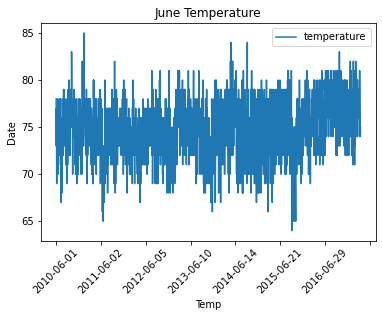

In [35]:
# Sort the dataframe by date
June_df = June_df.sort_index()
print(June_df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
June_df.plot()
plt.title('June Temperature')
plt.xlabel('Temp')
plt.ylabel('Date')
plt.xticks(rotation=45)

## D2: Determine the Summary Statistics for December

In [22]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(Dec_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [23]:
# 7. Convert the December temperatures to a list.
Dec_list = list(Dec_temp)
print(Dec_list)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [24]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(Dec_list, columns = ['date','temperature'])
Dec_df.set_index(Dec_df['date'], inplace=True)
print(Dec_df.to_string(index=False))

       date  temperature
 2010-12-01         76.0
 2010-12-03         74.0
 2010-12-04         74.0
 2010-12-06         64.0
 2010-12-07         64.0
 2010-12-08         67.0
 2010-12-09         77.0
 2010-12-10         66.0
 2010-12-11         69.0
 2010-12-12         68.0
 2010-12-13         68.0
 2010-12-14         71.0
 2010-12-15         74.0
 2010-12-16         67.0
 2010-12-17         66.0
 2010-12-18         69.0
 2010-12-19         71.0
 2010-12-23         70.0
 2010-12-24         70.0
 2010-12-26         74.0
 2010-12-27         74.0
 2010-12-28         71.0
 2010-12-29         75.0
 2010-12-30         75.0
 2010-12-31         72.0
 2011-12-01         69.0
 2011-12-02         68.0
 2011-12-03         73.0
 2011-12-04         74.0
 2011-12-05         73.0
 2011-12-06         73.0
 2011-12-07         73.0
 2011-12-08         73.0
 2011-12-09         71.0
 2011-12-10         73.0
 2011-12-11         73.0
 2011-12-12         77.0
 2011-12-13         72.0
 2011-12-14         71.0


In [25]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


       date  temperature
 2010-12-01         76.0
 2010-12-01         73.0
 2010-12-01         72.0
 2010-12-01         78.0
 2010-12-01         72.0
 2010-12-01         70.0
 2010-12-01         71.0
 2010-12-01         73.0
 2010-12-02         71.0
 2010-12-02         71.0
 2010-12-02         73.0
 2010-12-02         75.0
 2010-12-02         74.0
 2010-12-02         72.0
 2010-12-02         74.0
 2010-12-02         70.0
 2010-12-03         67.0
 2010-12-03         74.0
 2010-12-03         70.0
 2010-12-03         74.0
 2010-12-03         71.0
 2010-12-03         74.0
 2010-12-03         72.0
 2010-12-03         73.0
 2010-12-04         75.0
 2010-12-04         72.0
 2010-12-04         77.0
 2010-12-04         74.0
 2010-12-04         74.0
 2010-12-04         78.0
 2010-12-04         74.0
 2010-12-05         66.0
 2010-12-05         69.0
 2010-12-05         71.0
 2010-12-05         78.0
 2010-12-05         73.0
 2010-12-05         73.0
 2010-12-05         69.0
 2010-12-06         65.0


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '2016-12-01'),
  Text(0.0, 0, '2010-12-01'),
  Text(200.0, 0, '2010-12-27'),
  Text(400.0, 0, '2011-12-23'),
  Text(600.0, 0, '2012-12-20'),
  Text(800.0, 0, '2013-12-17'),
  Text(1000.0, 0, '2014-12-12'),
  Text(1200.0, 0, '2015-12-11'),
  Text(1400.0, 0, '2016-12-13'),
  Text(1600.0, 0, '')])

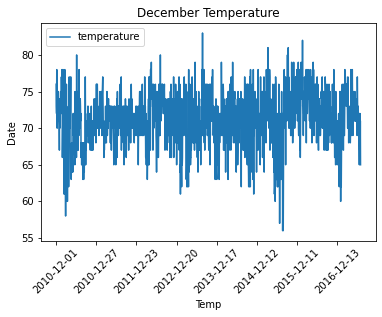

In [37]:
# Sort the dataframe by date
Dec_df = Dec_df.sort_index()
print(Dec_df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
Dec_df.plot()
plt.title('December Temperature')
plt.xlabel('Temp')
plt.ylabel('Date')
plt.xticks(rotation=45)